In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To display plots inside the notebook
%matplotlib inline


In [8]:
# Load the CSV file
df = pd.read_csv("train.csv")

# Display the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Shape of the dataset (rows, columns)
df.shape


(891, 12)

In [12]:
# Overview of column types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# Summary statistics for numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Check how many people survived vs did not
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

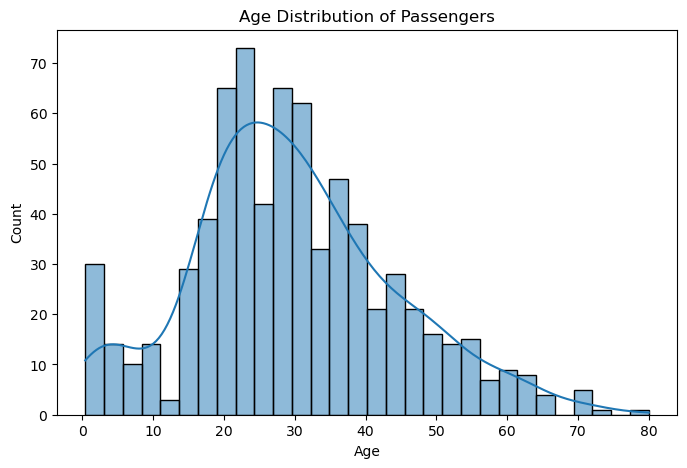

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Observation:**  
Histograms show the distribution of each numerical variable. Several features exhibit skewness, particularly right-skewed distributions. Some histograms also show long tails or uneven class distributions, indicating potential data imbalance.

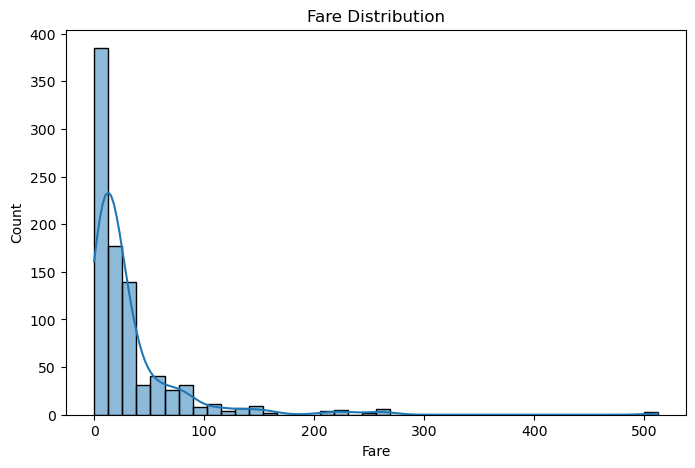

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


### Observations from Fare Distribution

- Fare values are **heavily right-skewed**.
- A majority of passengers paid **less than ₹100**.
- There are a few **outliers** with fares over ₹500, possibly in first class.

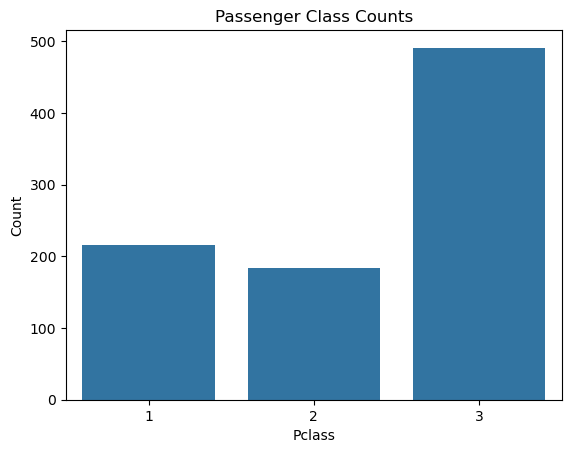

In [22]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Counts')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


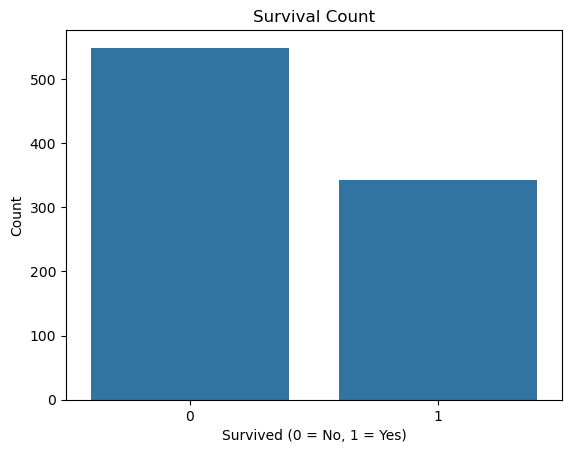

In [24]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


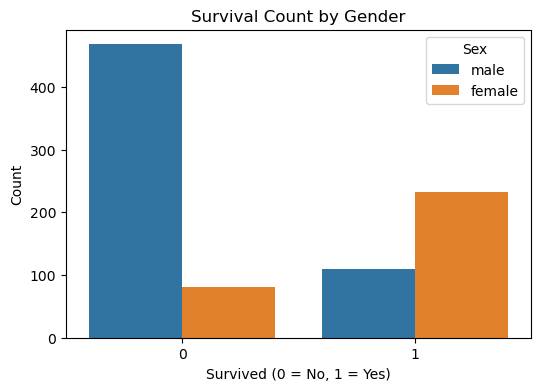

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


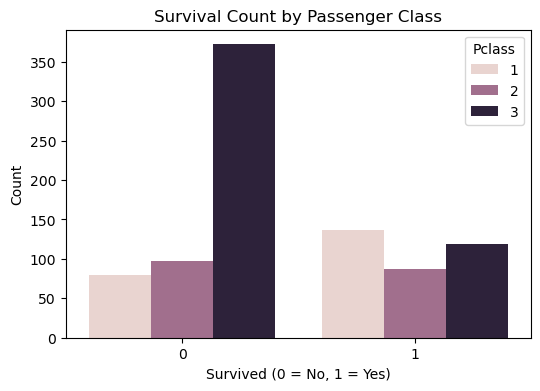

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


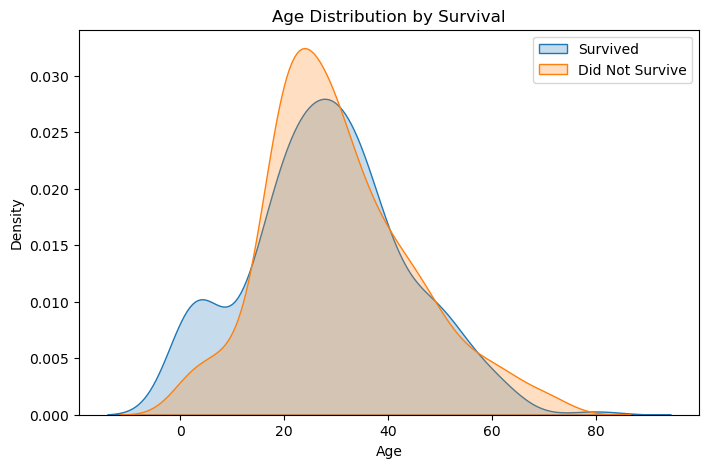

In [34]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'].dropna(), label='Survived', fill=True)
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'].dropna(), label='Did Not Survive', fill=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


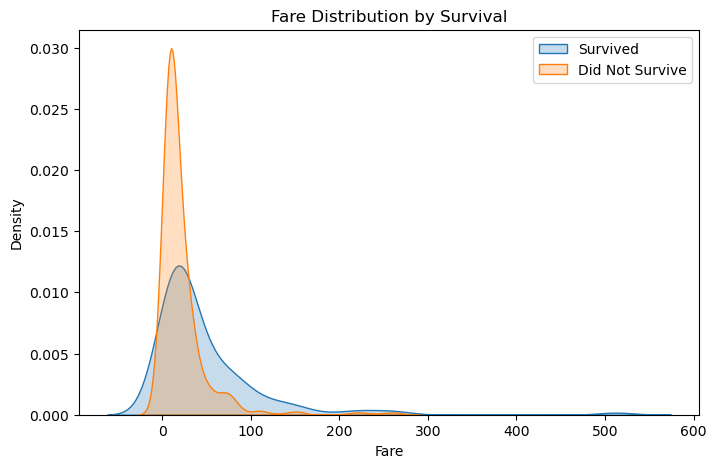

In [36]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df['Survived'] == 1, 'Fare'], label='Survived', fill=True)
sns.kdeplot(df.loc[df['Survived'] == 0, 'Fare'], label='Did Not Survive', fill=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()


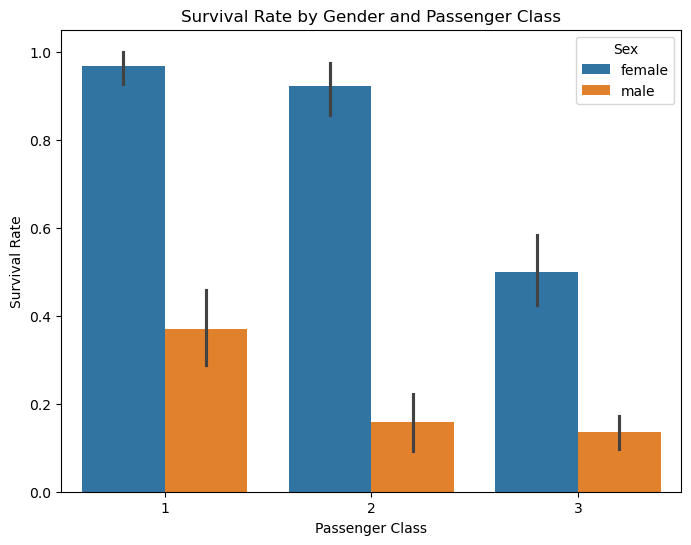

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Gender and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


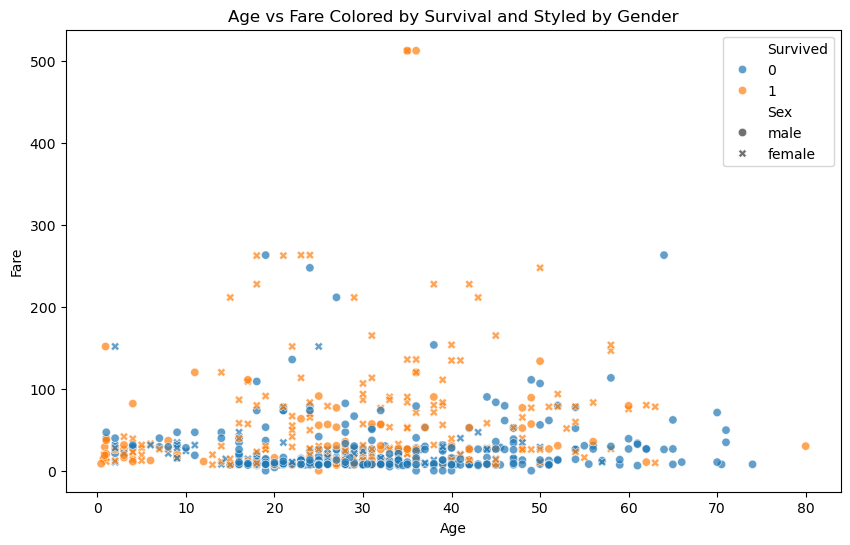

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=df, alpha=0.7)
plt.title('Age vs Fare Colored by Survival and Styled by Gender')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


**Observation:**  
Scatterplots illustrate the relationships between two features at a time. In several combinations, visual separation between classes can be observed, which is beneficial for classification tasks. Linear or non-linear trends are visible in some pairs, aiding in feature selection.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

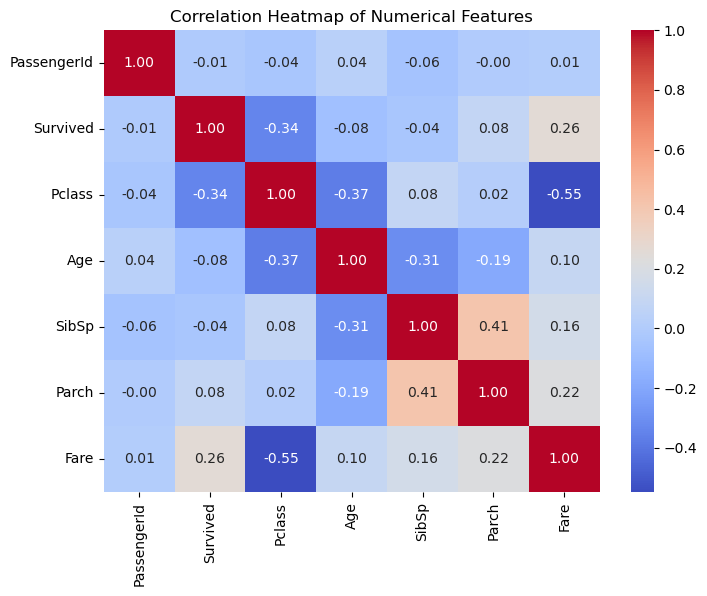

In [46]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # select numeric columns only
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



**Observation:**  
The heatmap highlights feature correlations. Strong positive/negative correlations are observed between certain feature pairs, suggesting potential multicollinearity. Features with low correlation might contribute independently to the target prediction.

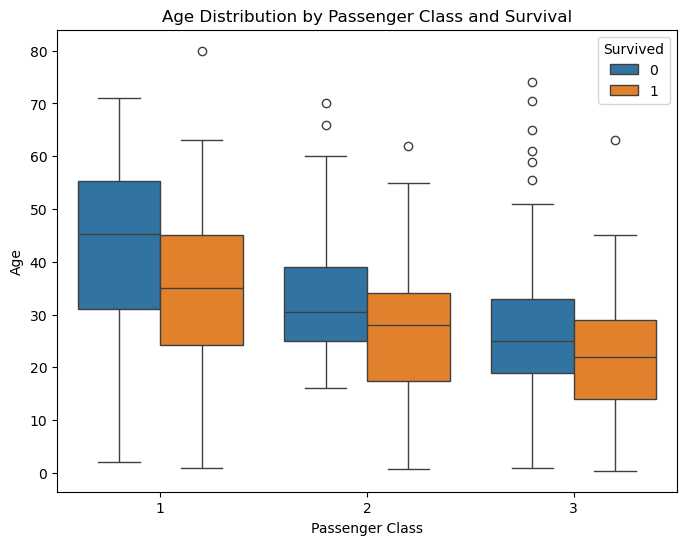

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age Distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


**Observation:**  
Boxplots reveal the spread and central tendency of each feature, along with outliers. Multiple features show significant outliers, which may impact model training. The median and IQR vary across features, and for class-specific boxplots, some differences in spread suggest class influence.

In [56]:
# Extract title using a raw string to avoid warning
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Rare'
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Normalize similar titles
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


In [58]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Title'
df = pd.get_dummies(df, columns=['Title'], drop_first=True)


In [60]:
df['Age'] = df.groupby('Title_Mr')['Age'].transform(lambda x: x.fillna(x.median()))


In [64]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)



In [72]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


In [74]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [76]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [78]:
print(df.columns)
print(df.head())

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Embarked_Q',
       'Embarked_S', 'FamilySize'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Title_Miss  Title_Mr  \
0         0       3    0  22.0      1      0   7.2500       False      True   
1         1       1    1  38.0      1      0  71.2833       False     False   
2         1       3    1  26.0      0      0   7.9250        True     False   
3         1       1    1  35.0      1      0  53.1000       False     False   
4         0       3    0  35.0      0      0   8.0500       False      True   

   Title_Mrs  Title_Rare  Embarked_Q  Embarked_S  FamilySize  
0      False       False       False        True           2  
1       True       False       False       False           2  
2      False       False       False        True           1  
3       True       False       False        True           2  
4      Fa

In [80]:
print(df[['Sex', 'Age', 'Fare'] + [col for col in df.columns if col.startswith('Title_')]].head())


   Sex   Age     Fare  Title_Miss  Title_Mr  Title_Mrs  Title_Rare
0    0  22.0   7.2500       False      True      False       False
1    1  38.0  71.2833       False     False       True       False
2    1  26.0   7.9250        True     False      False       False
3    1  35.0  53.1000       False     False       True       False
4    0  35.0   8.0500       False      True      False       False


In [84]:
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')
y = df['Survived']


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
 [[90 15]
 [16 58]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f"Test set accuracy with best RF: {accuracy_score(y_test, y_pred_best_rf):.4f}")


Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best CV accuracy: 0.8370
Test set accuracy with best RF: 0.8324


In [103]:
print(df.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Embarked_Q',
       'Embarked_S', 'FamilySize'],
      dtype='object')


In [105]:
import pandas as pd

# Assuming you've already loaded your dataset into 'df'
# Example: df = pd.read_csv("your_file.csv")

# Value counts for Survived
print("Survived:\n", df['Survived'].value_counts(), "\n")

# Value counts for Pclass
print("Pclass:\n", df['Pclass'].value_counts(), "\n")

# Value counts for Sex
print("Sex:\n", df['Sex'].value_counts(), "\n")

# Summary stats for Age
print("Age Summary:\n", df['Age'].describe(), "\n")

# Value counts for SibSp
print("SibSp:\n", df['SibSp'].value_counts(), "\n")

# Value counts for Parch
print("Parch:\n", df['Parch'].value_counts(), "\n")

# Summary stats for Fare
print("Fare Summary:\n", df['Fare'].describe(), "\n")

# Value counts for Title (one-hot encoded columns)
print("Title_Miss:\n", df['Title_Miss'].value_counts(), "\n")
print("Title_Mr:\n", df['Title_Mr'].value_counts(), "\n")
print("Title_Mrs:\n", df['Title_Mrs'].value_counts(), "\n")
print("Title_Rare:\n", df['Title_Rare'].value_counts(), "\n")

# Embarked columns (one-hot encoded)
print("Embarked_Q:\n", df['Embarked_Q'].value_counts(), "\n")
print("Embarked_S:\n", df['Embarked_S'].value_counts(), "\n")

# Family Size
print("FamilySize:\n", df['FamilySize'].value_counts(), "\n")


Survived:
 Survived
0    549
1    342
Name: count, dtype: int64 

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Sex:
 Sex
0    577
1    314
Name: count, dtype: int64 

Age Summary:
 count    891.000000
mean      29.433412
std       13.054994
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64 

SibSp:
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 

Parch:
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 

Fare Summary:
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64 

Title_Miss:
 Title_Miss
False    706
True     185
Name: count, dtype: int64 

Title_Mr:
 Title_Mr
True     517
False    374
Name: count, dtype: int64 

Title_Mrs:
 Title_Mrs
False    765
True

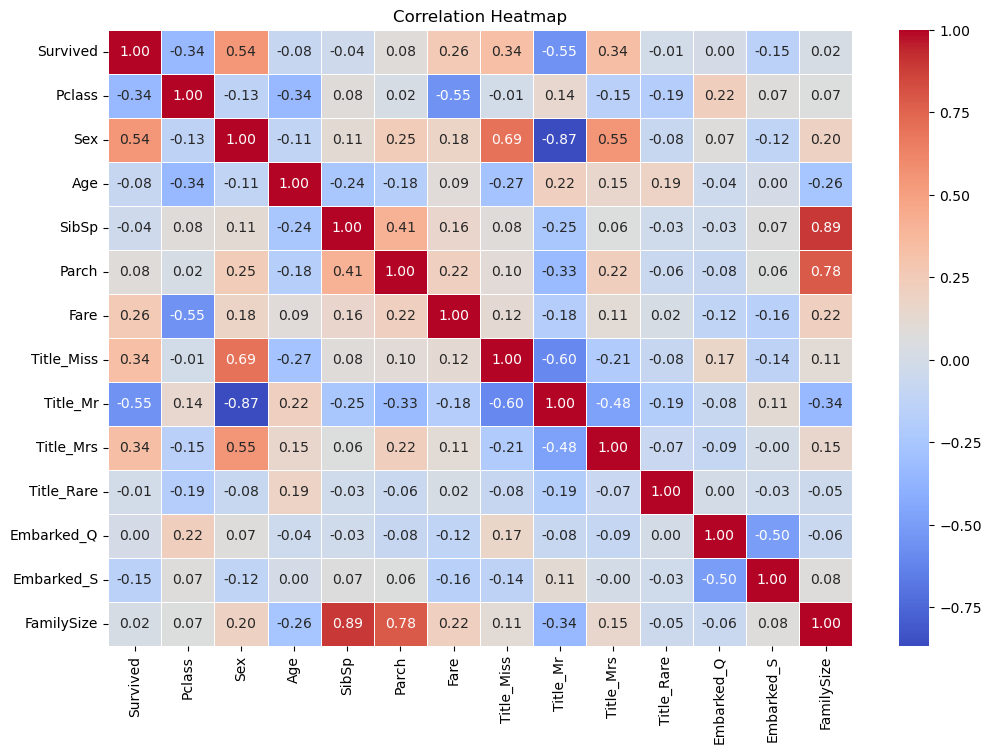

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 8))

# Create the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
### 🔍 Observations from Correlation Heatmap:
- Survival has a positive correlation with `Fare`, `Title_Miss`, and `Title_Mrs`.
- `Pclass` and `Title_Mr` show a negative correlation with survival.
- `SibSp` and `Parch` have weak positive correlation with survival.


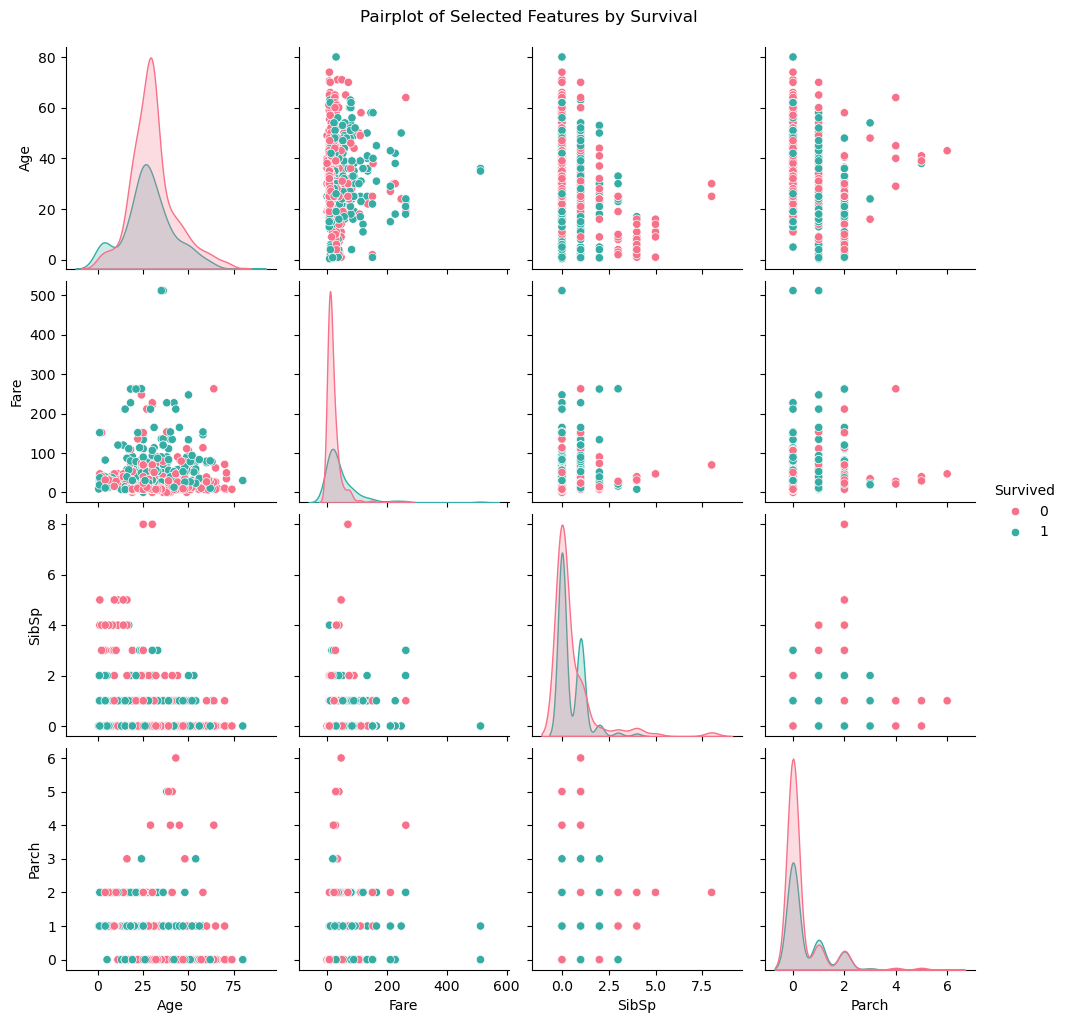

In [109]:
# Select a few numerical features to compare with survival
selected_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']

# Pairplot with hue = 'Survived'
sns.pairplot(df[selected_features], hue='Survived', palette='husl')
plt.suptitle("Pairplot of Selected Features by Survival", y=1.02)
plt.show()


In [117]:
import seaborn as sns


In [119]:
selected_columns = ['age', 'fare', 'pclass', 'survived']


In [123]:
print(df.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Embarked_Q',
       'Embarked_S', 'FamilySize'],
      dtype='object')


In [127]:
for col in df.columns:
    print(col)


Survived
Pclass
Sex
Age
SibSp
Parch
Fare
Title_Miss
Title_Mr
Title_Mrs
Title_Rare
Embarked_Q
Embarked_S
FamilySize


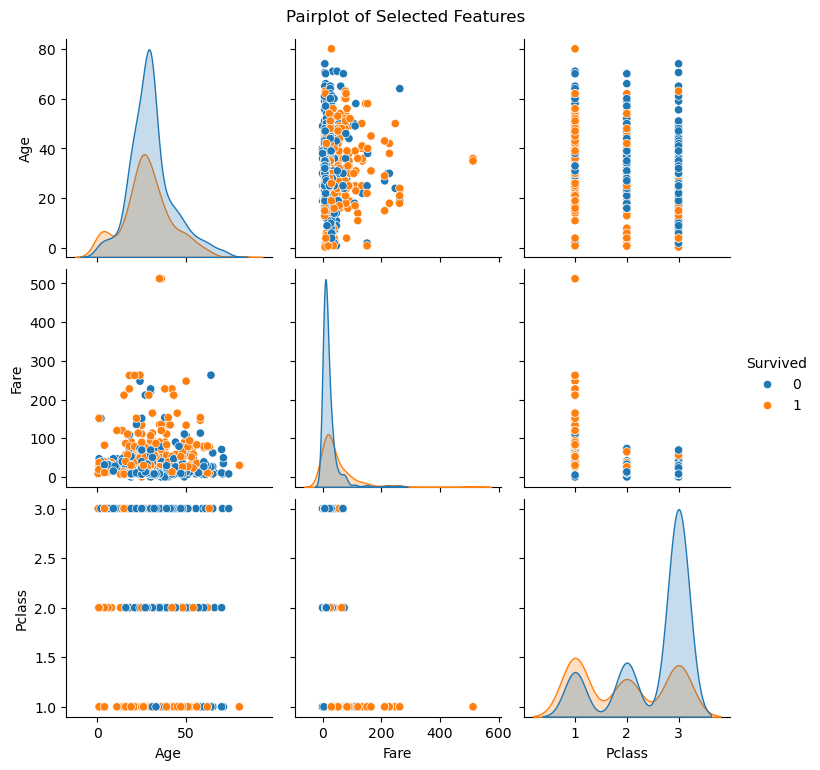

In [129]:
selected_columns = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(df[selected_columns].dropna(), hue='Survived')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


### Observations from Pairplot

- Passengers in **Pclass 1** generally had **higher survival rates** than those in lower classes.
- Those who paid **higher fares** were more likely to survive, indicating a possible correlation between ticket price and survival.
- The **Age** distribution shows survivors were more common between ages **20 to 40**, although people of all ages were affected.
- **Pclass** is categorical but clearly shows clustering in the scatterplots.


## Summary of EDA

- **Pclass** significantly affects survival; passengers in first class had better chances.
- **Gender** plays a major role; females had much higher survival rates than males.
- **Younger passengers**, especially children, were more likely to survive.
- **Fare** is positively associated with survival; those who paid more had higher chances.
- There are **missing values** in some columns like Age and Cabin which should be handled.
- Data is somewhat **skewed** for features like Fare and Age, with a few outliers present.
